In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

Preprocesamiento de los datos

In [ ]:
# Cargamos el dataset de los vinos
cancer = load_breast_cancer()
X=cancer['data']
y = cancer['target']
names = cancer['target_names']
feature_names = cancer['feature_names']
print(names)
print(feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# Dividimos los datos en entrenamiento y validación. Se utiliza 70 por ciento
# para entrenar y 30 por ciento para validar.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [ ]:
# Ahor estandarizamos los datos para que tengan media cero y varianza 1
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Construcción de la matriz de covarianza

In [ ]:
# Obtenemos la matriz de covarianza
cov_mat = np.cov(X_train_std.T)

# Obtenemos los eigenvalores y eigenvectores de la matriz de covarianza
# ---- notar que todos son no negativos---------
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

[1.33619996e+01 5.77613227e+00 2.83172331e+00 1.99464701e+00
 1.56506341e+00 1.18173548e+00 7.39253182e-01 4.81500525e-01
 4.47377728e-01 3.59251865e-01 2.76598828e-01 2.41469690e-01
 1.89614117e-01 1.51520781e-01 1.00837584e-01 7.31514176e-02
 5.65453910e-02 5.45293598e-02 4.62442661e-02 3.14881362e-02
 2.80669748e-02 2.36060675e-02 1.26373736e-04 6.33203650e-04
 1.24812097e-03 1.98992275e-02 1.57750910e-02 6.29340590e-03
 8.15218251e-03 1.10821457e-02]


Visualización de "que tanta información" captura cada eigenvector

In [ ]:
# Obtenemos de forma acumulativa que tanta "informacion" van teniendo los primeros k eigenvectores
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)] # Reverse porque los queremos en orden descendente.
cum_var_exp = np.cumsum(var_exp)

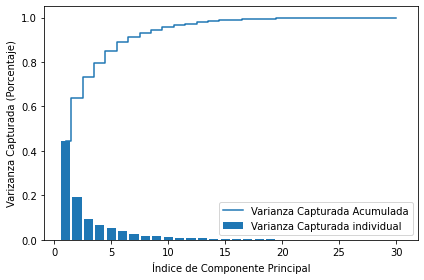

In [ ]:
plt.bar(range(1, 31), var_exp, align='center', label='Varianza Capturada individual')
plt.step(range(1, 31), cum_var_exp, where='mid', label='Varianza Capturada Acumulada')
plt.ylabel('Varizanza Capturada (Porcentaje)')
plt.xlabel('Índice de Componente Principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Construcción de una matriz de proyección al nuevo espacio (con dimensión reducida)

In [ ]:
# hacer una lista de pares (eigenvalor, eigenvector)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Reordenar en orden descendente (segun la varianza capturada)
eigen_pairs.sort(key=lambda k: k[0], reverse=True)


Elegimos componentes y hacemos la reducción

en este caso las primeras 2 componentes capturan aproximadamente el 60 por ciento de la información total del dataset

In [ ]:
# Obtenemos la matriz que tiene las columnas correspondientes a los dos primero eigenvectores
W = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
W

array([[ 0.2185744 , -0.23269304],
       [ 0.09943658, -0.04518212],
       [ 0.22689759, -0.21511138],
       [ 0.22041417, -0.23091785],
       [ 0.14604177,  0.18164928],
       [ 0.24007255,  0.14810627],
       [ 0.26068389,  0.04649103],
       [ 0.25985533, -0.04286871],
       [ 0.1405877 ,  0.19442808],
       [ 0.06125885,  0.3644168 ],
       [ 0.20734509, -0.1112404 ],
       [ 0.01820432,  0.08220532],
       [ 0.21094537, -0.09477317],
       [ 0.2004511 , -0.15234119],
       [ 0.00988444,  0.20625773],
       [ 0.16686329,  0.23580134],
       [ 0.15908967,  0.18699806],
       [ 0.18553431,  0.11315016],
       [ 0.04281591,  0.19027379],
       [ 0.10637555,  0.27788893],
       [ 0.22879137, -0.21466785],
       [ 0.10073717, -0.03365085],
       [ 0.23671966, -0.19619496],
       [ 0.22617485, -0.21411621],
       [ 0.1236782 ,  0.18696912],
       [ 0.20970098,  0.15116191],
       [ 0.22807551,  0.09811137],
       [ 0.25096058, -0.00580671],
       [ 0.12005442,

In [ ]:
# Proyectamos hacia el espacio reducido
X_train_pca = X_train_std.dot(W)

Visualización del espacio reducido

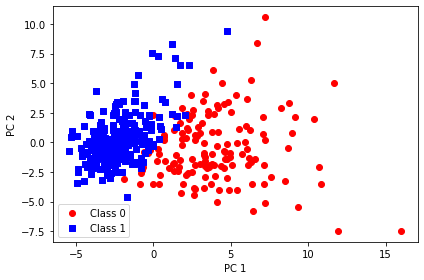

In [ ]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m, in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=f'Class {l}', marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()